# Chapter 9 - Unsupervised Learning Techniques



The vast majority of the available data is unlabeled: We have the input features X, but we dont have the labels Y.

Human labeling is expensive, and datasets usually change so its even more time-consuming to keep the training data updated. This is where unsupervised learning comes in.

In previous chapter we looked at the most common unsupervised learning task: dimensionality reduction.

In this chapter we will look at a few more:-
- Clustering
  - the goal is to group similar instances together into _clusters_. Clusters is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionalty reduction
- Anomaly detection (aka outlier detection)
  - the goal is to learn what 'normal' data looks like, and then use it to detect abnormal instances.
  - 'inliers' (normal) vs 'outliers' (abnormal)
  - useful in fraud detection, detecting defective products in manufacturing, identifying new trends in time series, or removing outliers from a datset before training another model to improve the performance of the resulting model
- Density estimation
  - goal is to estimate the _probability density function_ (PDF) of the random process that generated the dataset.
  - commonly used for anomaly detection - instances located at very low-density regions are likely to be anomalies
  - also useful for data analysis and visualization

Lets start with two clustering algorithms

**k-means and DBSCAN**

As you enjoy a hike in the mountains, you stumble upon a plant you have never
seen before. You look around and you notice a few more. They are not identical, yet they are sufficiently similar for you to know that they most likely belong to the same species (or at least the same genus). You may need a botanist to tell you what species that is, but you certainly don’t need an expert to identify groups of similar-looking objects. This is called clustering: it is the task of identifying similar instances and assigning them to clusters, or groups of similar instances.
- Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task

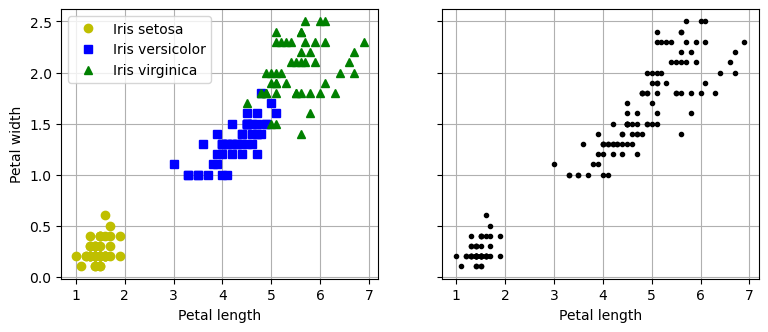

In [2]:
# extra code – this cell generates and saves Figure 9–1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

# save_fig("classification_vs_clustering_plot")
plt.show()

On the left is the iris dataset (introduced in Chapter 4), where each instance’s species (i.e., its class) is represented with a different marker. It is a labeled dataset, for which classification algorithms such as logistic regression, SVMs, or random forest classifiers are well suited. On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore.

It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct subclusters. That said, the dataset has two additional features (sepal length and width) that are not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster).

C:\Users\asuchar\AppData\Local\Temp\ipykernel_4252\1418467632.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


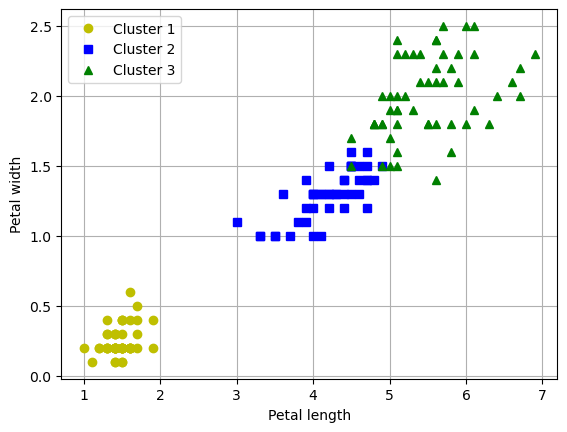

In [3]:
# extra code

import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

**Note**: the above figure shows how a Gaussian mixture model (explained later in this chapter) can actually separate these clusters pretty well using all 4 features: petal length & width, and sepal length & width. This code maps each cluster to a class. Instead of hard coding the mapping, the code picks the most common class for each cluster using the `scipy.stats.mode()` function:

Clustering can also be used for:-
- Customer segmentation
  - you can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed
- Data analysis
  - When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately
- Dimensionality Reduction
  - Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster; affinity is any measure of how well an instance fits into a cluster. Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional. The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.
- Feature engineering
  - clustered affinities can be useful as extra features (e.g. in housing dataset we using k-mean to add geographic cluster affinity to get better performance)
- Anomaly detection
  - Any instance that has a low affinity to all the clusters is likely to be an anomaly. E.g. if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second
- Semi-supervised learning
  - if you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance
- Search engines
  - Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you'd need to do is use the trained clustering model to find this image's cluster and you could then simply return all the images from this cluster
- Image segmentation
  - By clustering pixels according to their color, then replacing each pixel's color with the mean color of its cluster, it is possible to considerable reduce the number of different colors in an image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contors of each object.
 

There is no universal definition of what a cluster is: it depends on the context, and different algorithms will capture different types of clusters
- some algos will look for instances centered around a particular point (called a centroid)
- some will look for continuous regions of densely packed instances: these clusters can take on any shape
- some algorithms are hierarchical, looking for clusters of clusters

**k-means**

Consider the unlabeled dataset represented below: you can clearly see five blobs of instances. The k-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations. 

It basically finds each blob's center and tries to assign each instance to the closest blob.

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)


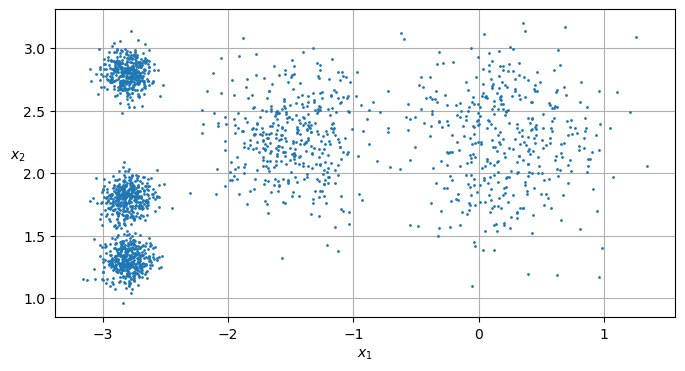

In [5]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
# save_fig("blobs_plot")
plt.show()

In [6]:
k = 5 # need to specify k (number of clusters to find)
# from looking at data, we know its 5, but usually its not so easy
kmeans = KMeans(n_clusters=k, random_state=42) 
y_pred = kmeans.fit_predict(X)

In the context of clustering, an instance’s label is the index of the cluster to which the algorithm assigns this instance; this is not to be confused with the class labels in classification, which are used as targets.
- remember that clustering is an unsupervised learning task


In [7]:
# - KMeans instance preserves the predicted labels of the instances
# it was trained on, available via the `labels_` instance variable

print(y_pred)
print(y_pred is kmeans.labels_)

# we can also look at the five centroids the algorithm found
print(kmeans.cluster_centers_)

# you can easily assign new instances to the cluster whos centroid is closest
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

[4 0 1 ... 2 1 0]
True
[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]


array([1, 1, 2, 2])

If you plot the cluster’s decision boundaries, you get a Voronoi tessellation:  where each centroid is represented with an X

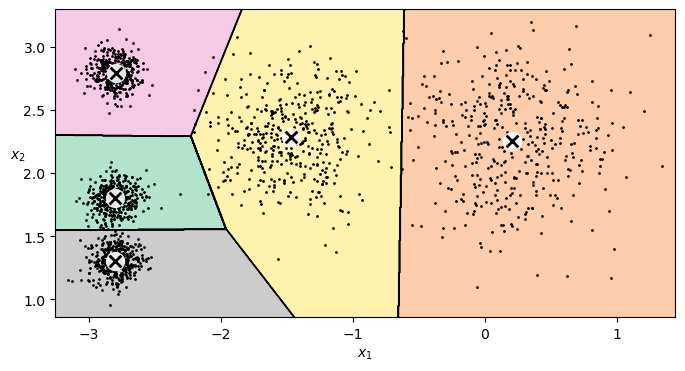

In [8]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
# save_fig("voronoi_plot")
plt.show()

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled, especially near the boundary between the top-left cluster and the central cluster. Indeed, the k-means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.
- Instead of assigning each instance to a single cluster, which is called _hard clustering_
- it can be useful to give each instance a score per cluster, which is called _soft clustering_.
  - the score can be the distance between the instance and the centroid
  - or a similarity score (or affinity) such as the Gaussian radial basis function we used in Chapter 2

In [9]:
# in the KMeans class, the transform() method
# measures the distance from each instance to every centroid
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

**The k-means algorithm**

Since we given neither the labels nor the centroid, we start by placing the centroids randomly (i.e. pick k instances at random from the dataset and using their locations as centroid).
- then label the instances, update the centroids, label the instances, update the centroids, and so on
- until the centroid stop moving
- the algorithm is guaranteed to converge because the mean squared distance between the instances and their closest centroid will go down with each step, and since it cannot be negative, its guaranteed to converge.
- Although the algorithm is guaranteed to converge, it may not converge to the right solution (it may converge to a local optimum)
  - it depends on the centroid initialization

Lets look at a few way we can mitigate this risk by improving the centroid initialization.

**Centroid initialization methods**

If you happen to know approximately where the centroids should be (e.g. if you ran another clustering algorithm earlier(, then you can set the init hyperparameter to a numpy array containing the list of centroids and set n_init to 1

In [10]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

Another solution is to run the algorithm multiple times with different random
initializations and keep the best solution.
-  `n_init` controls the number of random initializations
- it uses a performance metric called _inertia_ to determine which solution is the best one
- _inertia_ is the sum of the squared distances betweent he instances and their closest centroids.
- The `Kmeans` class runs the algorithm `n_init` times and keeps the model with the lowest inertia

In [11]:
kmeans.inertia_

211.5985372581684

TODO read section on _k-means++_ algorithm

**Accelerated k-means and mini-batch k-means**

On some large datasets with many clusters, the algorithm can be accelerated by avoiding many unnecessary distance calculations.
- it does so by exploiting the triangle inequality (that a straight line is always the shortest distance between two points)

Another important approach was highlighted using minibatches
- this speeds up the algorithm and makes it possible to cluster huge datasets that do not fit in memory.

In [12]:
# Scikit-Learn implements this algorithm in the MiniBatchKMeans class,
# which you can use just like the KMeans class

from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

Although the mini-batch k-means algorithm is much faster than the regular k-means algorithm, its inertia is generally slightly worse.


Also If the dataset does not fit in memory, the simplest option is to use the memmap class, as we did for incremental PCA in Chapter 8.

**Finding the optimal number of clusters**

In general, it won’t be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value.
- we cant just pick the model with the lowest inertia, its not a good metric because it tends to lower as we increase _k_
- we could plot inertia vs k, and pick the elbow where it starts decreasing more slowly, but this is a rather coarse technique

Another approach is to use the _silhouette score_.
- more computationally expensive

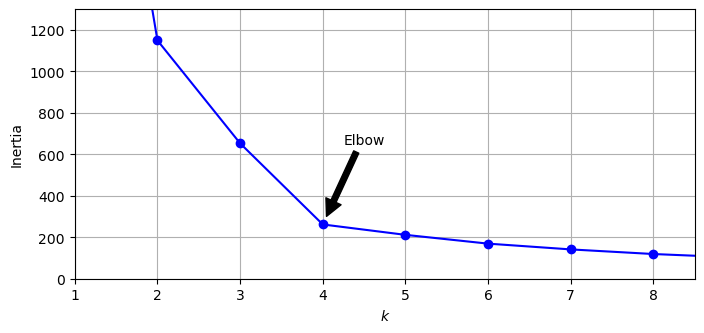

In [13]:

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
# save_fig("inertia_vs_k_plot")
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

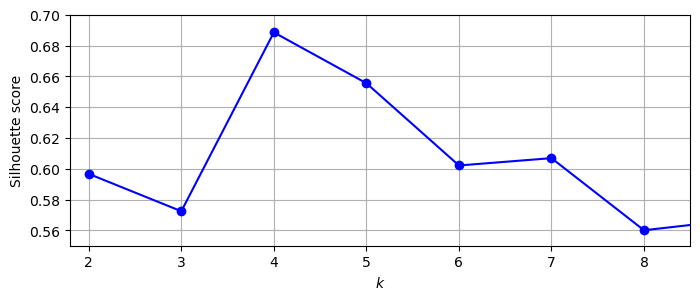

In [15]:
# extra code – this cell generates and saves Figure 9–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
# save_fig("silhouette_score_vs_k_plot")
plt.show()

An even more informative visualization is obtained when we plot every instance’s silhouette coefficient, sorted by the clusters they are assigned to and by the value of the coefficient. This is called a silhouette diagram (see Figure 9-10). Each diagram contains one knife shape per cluster.


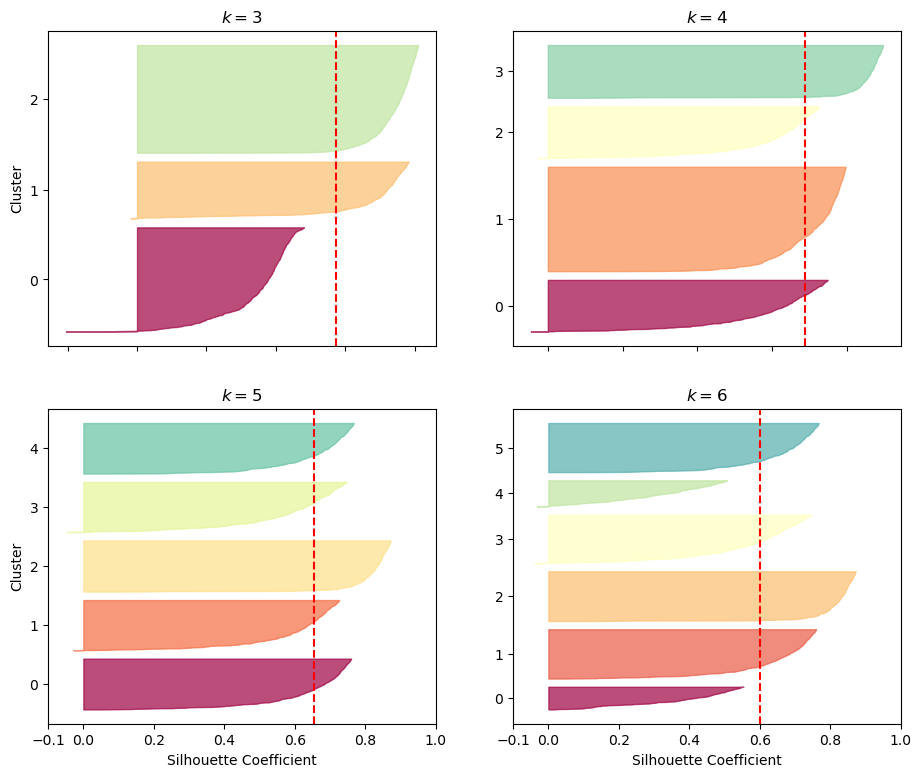

In [16]:

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

# save_fig("silhouette_analysis_plot")
plt.show()

The shape’s height indicates the number of instances in the cluster, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).

Here we can see that the clusters for k=3, and k=6 are rather bad because many of the instances do not reach the silhouette score, so it means that these are too close to other clusters.

k=4 and k=5 look pretty good, however k=5 has more clusters of similar sizes, so it seems like a good idea to use k=5.

**Limits of k-means**

k-means is pretty fast and scalable, but its not always perfect
- its necessary to run it multiple times to avoid suboptimal solutions
- plus you need to specify the number of clusters which can be a hassle
- also it doesnt behave well when the clusters have varying sizes, densities, nonspherical shapes

On elliptical cluster types, Gaussian mixture models work great.

It is important to scale the input features (see Chapter 2) before you run k-means, or the clusters may be very stretched and k-means will perform poorly.

**Using Clustering for Image Segmentation**

- color segmentation - pixels of same color get assigned to same segment
- semantic segmentation - pixels of same object type get assigned to same segment
- instance segmentation - pixels of same instance get assigned to same segment

**Using Clustering for Semi-Supervised Learning**

- used when we have plenty of unlabeled instances and very few labeled instances.
- lets use the MNIST-like dataset for this section

In [17]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [18]:
# we will pretend we only have labels for 50 instances
# to get a baseline performance, lets train a logistic
# regression model on these 50 labeled instances
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [19]:
# lets measure the accuracy of this model on the test set
log_reg.score(X_test, y_test)

0.7481108312342569

The models accuracy is 74%, if you try training the model on the full training set, you will find that it will reach about 90.7%.
Lets see how we can do better

In [23]:
# lets cluster the training set into 50 clusters
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
# then for each cluster,
# we'll find the image closest to the centroid
# these are called the representative images
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

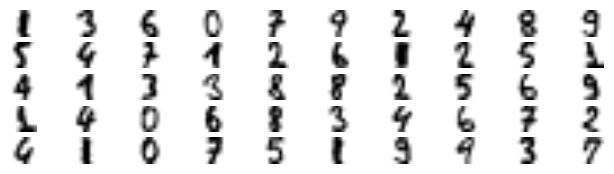

In [25]:
# extra code – this cell generates and saves Figure 9–13
# now lets plot these representative digits and label them manually
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

# save_fig("representative_images_plot", tight_layout=False)
plt.show()

In [26]:
# lets look at each image and manually label them
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster. Let’s see if the performance is any better:

In [24]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

we jumped from 74.8% accuracy to 84.9% although we are still only training the model on 50 instances.
- since its costly and painful to label instances, especially when it has to be done manually by experts, its a good idea to label representative instances rather than random instances.

In [27]:
# perhaps we can go one step further
# what if we propagated the labels to all the other instances
# in the same cluster?
# This is called 'label propagation'
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

C:\Users\asuchar\AppData\Local\miniconda3\envs\homl3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8967254408060453

We got another significant accuracy boost!
Lets see if we can do even better by ignoring the 1% of cluster instances that are farthest from their cluster center: this should eliminate some outliers

In [29]:
percentile_closest = 99

# The following code first computes the distance from each
# instance to its closest cluster center,
# then for each cluster it sets the 1% largest distances to –1. 
# Lastly, it creates a set without these instances marked with a –1
# distance:

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [31]:
# now lets train the model again on this partially propagated
# dataset and see what accuracy we get
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated,
            y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

Nice! With just 50 labeled instances (only 5 examples per class on average!) we got 90.9% accuracy, which is actually slightly higher than the performance we got on the fully labeled digits dataset (90.7%). This is partly thanks to the fact that we dropped some outliers, and partly because the propagated labels are actually pretty good—their accuracy is about 97.5%, as the following code shows

In [32]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

**Active Learning**

To continue improving our model and the training set, the next step could be to do a few rounds of _active learning_.
- when a human expert interacts with the learning algorithm
- providing labels for specific instances when the algorithm requests them
- there are many different strategies for active learning, but one of the most common ones is called uncertainty sampling
- here is how it works:-
  1) the model is trained on the labeled instances when the algorithm requests them.
  2) the instances for which the model is most uncertain (i.e. where its estimated probability is lowest) are given to the expert for labeling.
  3) you iterate this process until the performance improvement stops being worth the labeling effort

**DBSCAN**

Another clustering algorithm uses a very different approach based on local density estimation.
This approach allows the algorithm to identify clusters of arbitrary shapes.
- the algorithm defines clusters as continuous regions of high density. Heres how it works:-
  - For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.
  - If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.
  - All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
  - Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

The algorithm works well if all the clusters are well separated by low-density regions.

In [33]:
# lets try it on the moons dataset
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [36]:
# the labels of all the instances are now available in the
# 'labels_' instance variable
dbscan.labels_[:10]

array([1, 0, 0, 1, 2, 0, 0, 2, 2, 0], dtype=int64)

Notice that some instances have a cluster index equal to –1, which means that they are considered as anomalies by the algorithm

In [38]:
# the indices of the core instances are available in the 
# 'core_sample_indices_' instance variable
dbscan.core_sample_indices_[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 12], dtype=int64)

In [39]:
# the core instances themselves are available in the
# 'components_' instance variable
dbscan.components_

array([[ 0.05681922,  1.00392082],
       [ 1.00031664,  0.04504322],
       [ 1.06768487, -0.55247369],
       ...,
       [ 0.83960939,  0.61924086],
       [ 1.40757639, -0.39647189],
       [ 0.05180755,  0.25462444]])

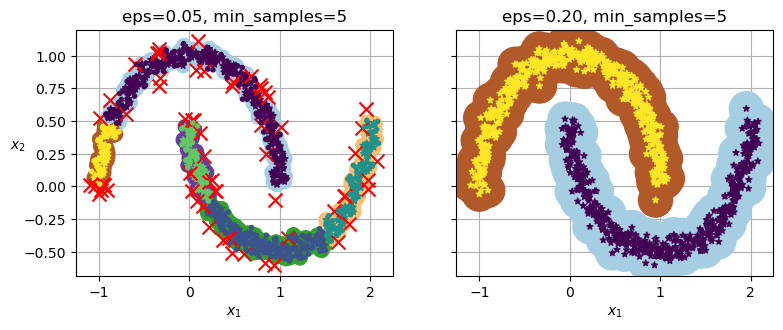

In [40]:
# extra code – this cell generates and saves Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

# save_fig("dbscan_plot")
plt.show()

This clustering is represented in the lefthand plot. As you can see, it identified quite a lot of anomalies, plus seven different clusters. How disappointing!

Fortunately, if we widen each instance’s neighborhood by increasing eps to 0.2, we get the clustering on the right, which looks perfect. Let’s continue with this model.

TODO finish remaining notes on DBSCAN

**Gaussian Mixtures**

A GMM (Gaussian Mixture Model) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.
- All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid
- Each cluster can have a different ellipsoidal shape, size, density and orientation
- When you observe an isntance, you know it was generated from one of the Gaussian distributions, but you are not told which one and you do not know the parameters of these distributions

There are several GMM variants. In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number k of Gaussian distributions

TODO read remaining notes on GMMs